## Question 5
- Count the number of black people convicted of felonies vs. white people convicted of misdemeanors (or not convicted at all) for the same offense by year
- I'm also looking at racial disparity by each disposition code (guilty, dismissed, insanity, etc). 

**Issues:**
- Try throwing in all races (just for funsies, it’s ok if it’s long)
- Maybe do like top 5 codeSections instead of the overall

In [8]:
import io
import os
import requests
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib as plt
import seaborn as sns

In [9]:
infile = '../Data/circuit_criminal_2019.csv'
spark = SparkSession \
    .builder \
    .appName("Criminal Expungement") \
    .getOrCreate()
circuit = spark.read.csv(infile, inferSchema=True, header = True)
circuit.createOrReplaceTempView('df')

In [10]:
DispositionCode_types = ['Guilty', 'Dismissed', 'Sentence/Probation Revoked',
                         'Nolle Prosequi', 'Resolved', 'Appeal Withdrawn',
                         'Not Guilty/Acquitted', 'Not True Bill', 'Remanded',
                         'No Indictment Presented', 'Mistrial',
                         'Not Guilty By Reason Of Insanity']

In [11]:
df_chargetype = spark.sql(
'''
SELECT DispositionCode, df.Race, count(DispositionCode) AS RCount, Total FROM df
INNER JOIN (
    SELECT Race, count(Race) as Total FROM df
    GROUP BY Race) c ON c.Race = df.Race
WHERE (DispositionCode = 'Guilty'            OR   DispositionCode = 'Not Guilty/Acquitted'              OR
       DispositionCode = 'Dismissed'         OR   DispositionCode = 'Resolved'                          OR
       DispositionCode = 'Nolle Prosequi'    OR   DispositionCode = 'Remanded'                          OR
       DispositionCode = 'Not True Bill'     OR   DispositionCode = 'Sentence/Probation Revoked'        OR
       DispositionCode = 'Mistrial'          OR   DispositionCode = 'Not Guilty By Reason Of Insanity'  OR
       DispositionCode = 'Appeal Withdrawn'  OR   DispositionCode = 'No Indictment Presented' ) 
GROUP BY DispositionCode, df.Race, Total
ORDER BY DispositionCode
'''
)
df_chargetype = df_chargetype.withColumn('Percentage',df_chargetype.RCount*100/df_chargetype.Total).select('DispositionCode','Race','Percentage','Total')

In [12]:
df = df_chargetype.toPandas()
df

,DispositionCode,Race,Percentage,Total
0,Appeal Withdrawn,"Other (Includes Not Applicable, Unknown)",2.937853,885
1,Appeal Withdrawn,Black,1.438227,32401
2,Appeal Withdrawn,Asian Or Pacific Islander,0.769231,260
3,Appeal Withdrawn,Hispanic,2.173913,368
4,Appeal Withdrawn,American Indian Or Alaskan Native,7.894737,38
5,Appeal Withdrawn,White,0.966051,43890
6,Dismissed,Hispanic,5.706522,368
7,Dismissed,White,8.056505,43890
8,Dismissed,"Other (Includes Not Applicable, Unknown)",15.932203,885
9,Dismissed,Asian Or Pacific Islander,6.538462,260


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

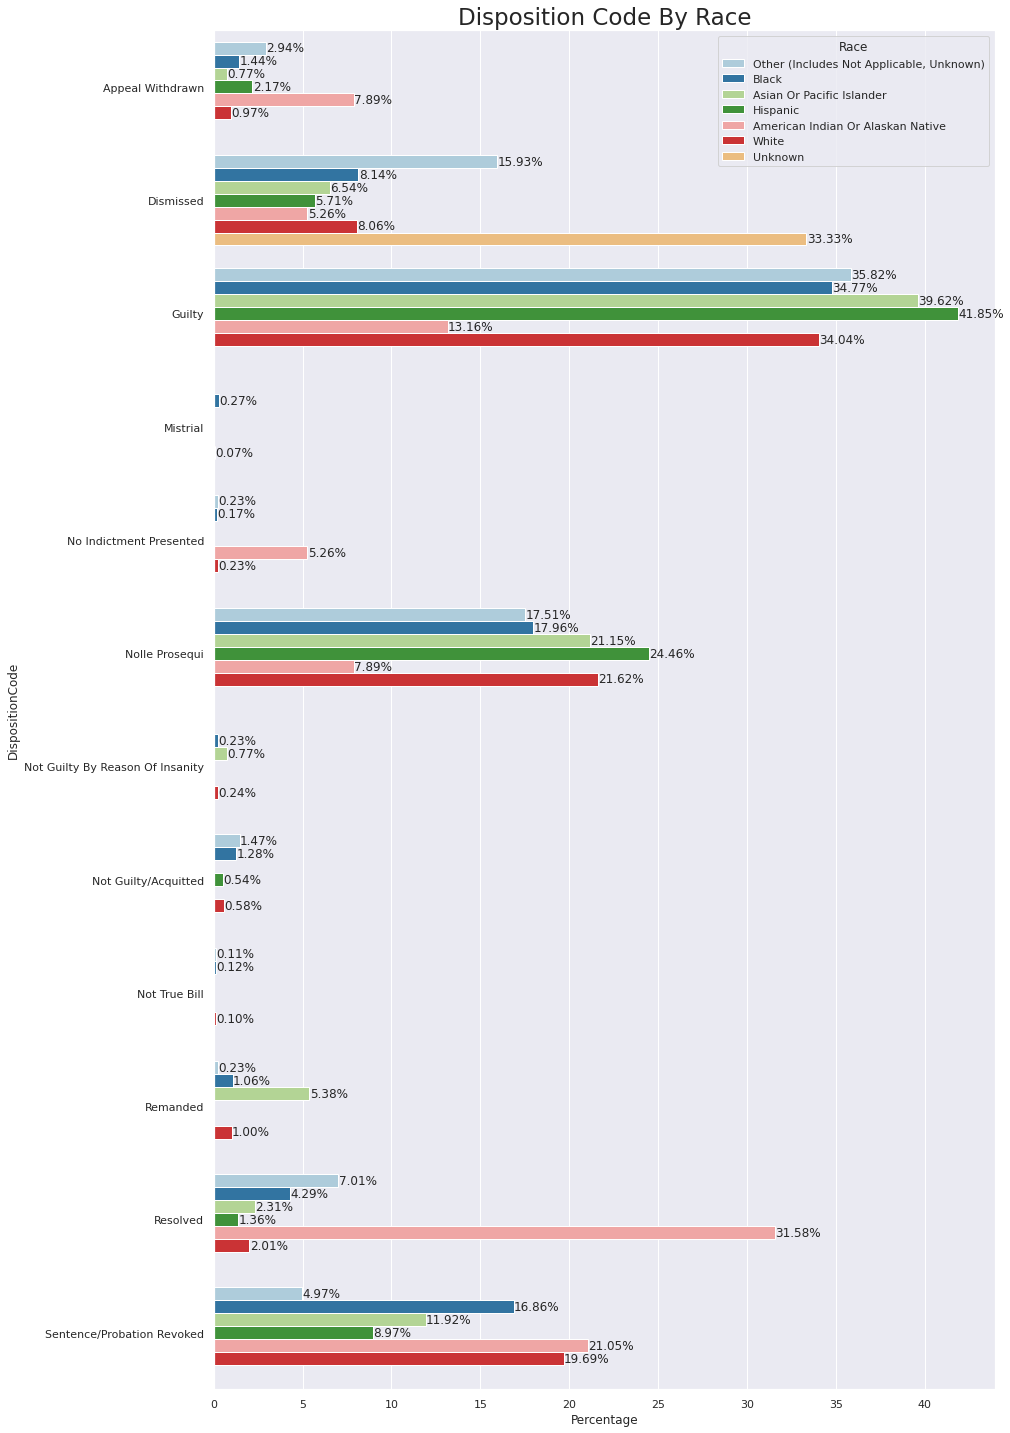

In [15]:
sns.set(rc={'figure.figsize':(14,25)})
sns.set(style="darkgrid")
sns.set_palette("Paired")
ax = sns.barplot(y="DispositionCode",
                 x="Percentage",
                 data=df, 
                 hue="Race")
ax.set_title('Disposition Code By Race', fontsize = 23)
for p in ax.patches:
    width = p.get_width()                   # get bar length
    ax.text(width + .02,                    # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}%'.format(width),        # set variable to display, 2 decimals
            ha = 'left',                    # horizontal alignment
            va = 'center')                  # vertical alignment